In [5]:
from sklearn.decomposition import PCA
import os
os.chdir('/home/nmduy/CA683/Credit Project')
import pandas as pd
import numpy as np
import random
#from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [33]:
data = pd.read_csv('data/encoded_train_dropna.csv')
data = data.drop(['SK_ID_CURR', 'DAYS_EMPLOYED_ANOM'], axis = 1)
X = data.drop('TARGET', axis = 1)

In [49]:
##### REMOVE 1-VALUE FT #####
remove_ft = []
for col in list(X.columns):
    if X[col].sum() == 0 or X[col].sum() == len(X[col]):
        remove_ft += [col]
len(remove_ft)

6

In [50]:
remove_ft

['FLAG_MOBIL',
 'FLAG_DOCUMENT_2',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_FAMILY_STATUS_Unknown',
 'ORGANIZATION_TYPE_XNA']

In [51]:
X = X.drop(remove_ft, axis=1)

In [ ]:
##### REMOVE FT THAT ONLY 1 VALUE IN ENTIRE DATASET #####
remove_ft = []
for col in list(X.columns):
    


In [52]:
##### Bartlett’s test #####
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(33780775.0995608, 0.0)

In [60]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X.iloc[:,0:90])
kmo_model

0.11035988033181082

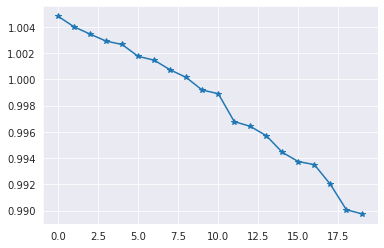

In [73]:
sns.set_style("darkgrid")
plt.plot(ev[80:100], '*-')
plt.show()

In [81]:
fa = FactorAnalyzer()
fa.set_params(n_factors=100, rotation='varimax')
fa.fit(X)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=100, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [82]:
loadings = fa.loadings_

In [84]:
loadings.shape

(173, 100)

In [88]:
ev, v = fa.get_eigenvalues()
ev.shape

(173,)

In [89]:
ind = np.argsort(loadings, axis=0) # sort ascending

In [93]:
ind_sort = ind[-5:,0:5]

In [94]:
ind_sort

array([[101,  79, 162,   2,  30],
       [  0,  37,  35,  13,  91],
       [  7,  74,  33,  81, 101],
       [  6,  22,  34,  20,  94],
       [  8,  21,  32,   4,  76]])

In [98]:
list_columns = np.asarray(list(X.columns))

In [102]:
list_columns[ind_sort[:,4]]

array(['EXT_SOURCE_2', 'OCCUPATION_TYPE_Accountants',
       'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Core staff',
       'NAME_EDUCATION_TYPE_Higher education'], dtype='<U49')

In [64]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(X)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 3.82595845e+00,  3.17753106e+00,  3.02363575e+00,  2.63216937e+00,
        2.54916710e+00,  2.36499090e+00,  2.22370751e+00,  2.10489843e+00,
        1.98947277e+00,  1.86367670e+00,  1.73476052e+00,  1.62585621e+00,
        1.58727584e+00,  1.55094126e+00,  1.52641608e+00,  1.46359363e+00,
        1.43453249e+00,  1.40330916e+00,  1.37337554e+00,  1.36950737e+00,
        1.33893292e+00,  1.32895873e+00,  1.30060050e+00,  1.28944512e+00,
        1.26249369e+00,  1.23534497e+00,  1.21554466e+00,  1.21069875e+00,
        1.20516684e+00,  1.20380431e+00,  1.20157246e+00,  1.19640827e+00,
        1.18037610e+00,  1.17092495e+00,  1.16282823e+00,  1.14872667e+00,
        1.13250770e+00,  1.13039515e+00,  1.11953860e+00,  1.11096315e+00,
        1.10126315e+00,  1.08927767e+00,  1.08578874e+00,  1.07343635e+00,
        1.07210016e+00,  1.06852751e+00,  1.06779861e+00,  1.06319452e+00,
        1.06110470e+00,  1.05933678e+00,  1.05343616e+00,  1.05236770e+00,
        1.04964186e+00,  